In [1]:
# Importing Libraries 
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sb

In [3]:
# Source - Netflix Tv Show and Movie Titles dataset 

filepath = '../PythonProject/titles.csv'

# CSV into dataframe
data = pd.read_csv(filepath)

data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [4]:
data.shape # columns, row 

(5806, 15)

In [5]:
# Descriptive Statistics of df 
data.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


In [6]:
# Datatypes within the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [7]:
# Checking to se if df has duplicated values 

data.duplicated().sum()


0

In [8]:
# checking if null values are present 

data.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

In [9]:
data.type.unique()

# in this project we will be focusing on Movies and Shows separately 

array(['SHOW', 'MOVIE'], dtype=object)

# Movies

In [10]:
movies = data[data.type == 'MOVIE']
movies.isnull().sum()

id                         0
title                      1
type                       0
description                8
release_year               0
age_certification       2353
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  308
imdb_score               352
imdb_votes               368
tmdb_popularity           61
tmdb_score               186
dtype: int64

In [11]:
movies.shape

(3759, 15)

In [17]:
movies_clean= movies.dropna(subset=['imdb_id','imdb_score','imdb_votes','tmdb_popularity','tmdb_score'])
movies_clean.shape

movies_clean.isnull().sum()

id                         0
title                      0
type                       0
description                1
release_year               0
age_certification       1953
runtime                    0
genres                     0
production_countries       0
seasons                 3255
imdb_id                    0
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
dtype: int64

In [15]:
Movies_c=movies_clean.drop(columns='seasons')
Movies_c.head()
Movies_c.shape

(3255, 14)

# Visualizations 


In [20]:
corr_movies = Movies_c.corr(method='pearson')
corr_movies

,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,1.000000,-0.237281,-0.158223,-0.204575,0.094562,0.003976
runtime,-0.237281,1.000000,0.122258,0.183049,0.033841,0.059397
imdb_score,-0.158223,0.122258,1.000000,0.215455,-0.092594,0.633689
imdb_votes,-0.204575,0.183049,0.215455,1.000000,0.103792,0.163018
tmdb_popularity,0.094562,0.033841,-0.092594,0.103792,1.000000,0.016850
tmdb_score,0.003976,0.059397,0.633689,0.163018,0.016850,1.000000


Text(0.5, 1.0, 'Movie Correlation Heatmap')

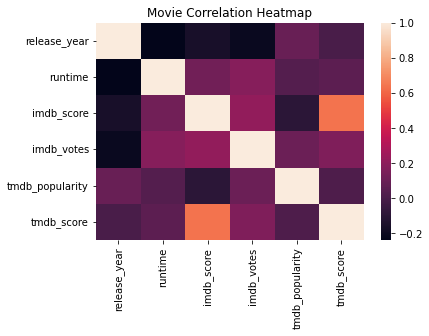

In [21]:
sb.heatmap(corr_movies, xticklabels=corr_movies.index, yticklabels=corr_movies.index)
plt.title ('Movie Correlation Heatmap')

In [25]:
corr_movies_pairs = corr_movies.unstack()

corr_movies_sorted = corr_movies_pairs.sort_values()
corr_movies_sorted

corr_movies_sorted[(corr_movies_sorted >0.5)]

imdb_score       tmdb_score         0.633689
tmdb_score       imdb_score         0.633689
release_year     release_year       1.000000
imdb_votes       imdb_votes         1.000000
imdb_score       imdb_score         1.000000
runtime          runtime            1.000000
tmdb_popularity  tmdb_popularity    1.000000
tmdb_score       tmdb_score         1.000000
dtype: float64

In [ ]:
# conclusing looking at Netlflix Movies titles 

# the Imdb and tmdb score have a strong positive correlation , which was expected as a good Movie 
# should have similar ratings 

# release year and run time have weak correlations with score and popularity 

# Shows

In [26]:
shows = data[data.type == 'SHOW']
shows.isnull().sum()

id                        0
title                     0
type                      0
description              10
release_year              0
age_certification       257
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                 136
imdb_score              171
imdb_votes              171
tmdb_popularity          33
tmdb_score              132
dtype: int64

In [27]:
shows.shape

(2047, 15)

In [28]:
shows_clean= shows.dropna(subset=['imdb_id','imdb_score','imdb_votes','tmdb_popularity','tmdb_score'])


shows_clean.isnull().sum()

id                        0
title                     0
type                      0
description               1
release_year              0
age_certification       188
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                   0
imdb_score                0
imdb_votes                0
tmdb_popularity           0
tmdb_score                0
dtype: int64

In [29]:
shows_clean.shape

(1786, 15)

In [30]:
corr_shows = shows_clean.corr()
corr_shows

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,1.000000,0.158611,-0.562657,-0.161061,-0.159715,-0.137259,-0.016689
runtime,0.158611,1.000000,-0.141650,0.233310,0.073456,0.035553,0.014648
seasons,-0.562657,-0.141650,1.000000,0.092355,0.210255,0.332407,0.033410
imdb_score,-0.161061,0.233310,0.092355,1.000000,0.245995,0.122929,0.338178
imdb_votes,-0.159715,0.073456,0.210255,0.245995,1.000000,0.407340,0.117662
tmdb_popularity,-0.137259,0.035553,0.332407,0.122929,0.407340,1.000000,0.093692
tmdb_score,-0.016689,0.014648,0.033410,0.338178,0.117662,0.093692,1.000000


Text(0.5, 1.0, 'Show Correlation Heatmap')

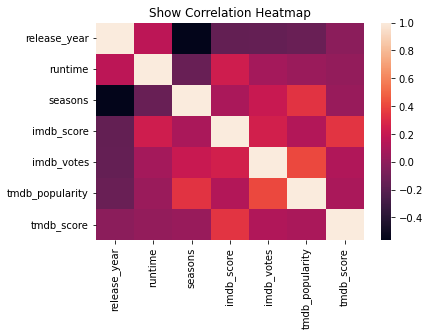

In [31]:
sb.heatmap(corr_shows, xticklabels=corr_shows.index, yticklabels=corr_shows.index)
plt.title ('Show Correlation Heatmap')

In [37]:
corr_show_pr = corr_shows.unstack()

corr_shows_sorted = corr_show_pr.sort_values()
corr_shows_sorted

corr_shows_sorted[(corr_shows_sorted >0.5)]

release_year     release_year       1.0
imdb_score       imdb_score         1.0
imdb_votes       imdb_votes         1.0
seasons          seasons            1.0
runtime          runtime            1.0
tmdb_popularity  tmdb_popularity    1.0
tmdb_score       tmdb_score         1.0
dtype: float64

In [ ]:
# IMDB and TMDB have a weak correlation , which does not make sense as a show should have similar ratings 

# run time and and release year also do not have a strong correlation with score or popularity 